In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
import itertools
import zipfile
from PIL import Image

In [2]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount = True)

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/ML Project/FireNet-LightWeight-Network-for-Fire-Detection

/content/gdrive/MyDrive/ML Project/FireNet-LightWeight-Network-for-Fire-Detection


In [4]:
#DATADIR = r'D:\EDU Files\project\fire\MNet_Vgg Fire tuning\BowFire_Data'
DATADIR = r'D:\EDU Files\project\fire\MNet_Vgg Fire tuning\data_without_BoWFire_With_NSDataset\test'


In [5]:
IMG_SIZE = 64
CATEGORIES = ['Fire', 'NoFire']
def create_training_data():
    training_data = []
    cnt = 0
    with zipfile.ZipFile('Dataset/Test_Dataset1__Our_Own_Dataset.zip', 'r') as zfile:
      file_list = zfile.namelist()
      for path in file_list:
        cnt = cnt+1
        if ".jpg" in path:
          data = zfile.read(path)
          img_array = cv2.imdecode(np.frombuffer(data, np.uint8), 1)
          new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
          class_num = CATEGORIES.index("Fire")
          if "NoFire" in path:
            class_num = CATEGORIES.index("NoFire")
          training_data.append([new_array, class_num])
    zfile.close()
    print(cnt)
    return(training_data)

In [6]:
training_data = create_training_data()

881


In [7]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

(64, 64, 3)

In [8]:
X.shape

(871, 64, 64, 3)

In [9]:
len(Y)

871

# Wrap #

In [ ]:
IMG_SIZE = 64
def create_training_data():
    training_data = []
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=C 1=O

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
              
    return training_data

In [ ]:
training_data = create_training_data()


100%|████████████████████████████████████████████████████████████████████████████| 28903/28903 [10:13<00:00, 47.11it/s]


In [ ]:
import random
test_image_num=58704
print(len(training_data))
random.shuffle(training_data)
test_labels=np.zeros((test_image_num,1))

c=0
for sample in training_data:
    test_labels[c]=(sample[1])
    c+=1
print(c)
actual_labels=(test_labels.reshape(test_image_num,))
print(actual_labels.shape)
actual_labels.astype(int)

58704
58704
(58704,)


array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0
X.shape[1:]

(64, 64, 3)

# Continue #

In [10]:
from keras.models import load_model
model=load_model('TrainedModels/something_new.h5')

In [11]:
predicted_labels=model.predict(X)
predicted_labels = predicted_labels.argmax(axis = 1)
# predicted_labels=(predicted_labels.reshape(np.array(Y).shape[0],))
# predicted_labels.astype(int)


Confusion matrix, without normalization
[[489 104]
 [ 13 265]]


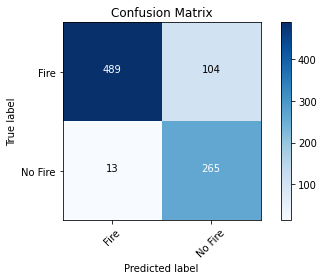

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(Y, predicted_labels)
#test_batches.class_indices
cm_plot_labels=['Fire','No Fire']
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion Matrix')

In [13]:
tp=cm[0][0]
fn=cm[0][1]
fp=cm[1][0]
tn=cm[1][1]
print("tp"+' '+str(tp))
print("fn"+' '+str(fn))
print("fp"+' '+str(fp))
print("tn"+' '+str(tn))

tp 489
fn 104
fp 13
tn 265


In [ ]:
Recall=tp/(tp+fn)
Precision=tp/(tp+fp)
f_measure= 2*((Precision*Recall)/(Precision+Recall))

print(Precision, Recall, f_measure)



0.9330543933054394 0.7521079258010118 0.8328664799253035


In [14]:
692/871

0.7944890929965557

In [ ]:
model.evaluate(X, Y)